<a href="https://colab.research.google.com/github/s00hyun/Today-I-Learned/blob/master/ML-DL/deep-learning-pytorch/lec4_cnn_mnist_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 라이브러리 로드

In [0]:
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## 2. 모델 선언

In [0]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7 * 7 * 32, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        flatten = out.reshape(out.size(0), -1)
        score = self.fc(flatten)
        prob = F.softmax(score, dim=1)
        return prob

## 3. 조건 설정

In [0]:
# 평가에 한 장의 이미지를 사용하므로.
batch_size = 1

## 4. 데이터로더 설정

In [0]:
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!






## 5. 모델 설정

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
!ls gdrive/'My Drive'/'Colab Notebooks'/'딥러닝수업'

 cnn.pt						  HW01.ipynb
'(Exp) 01_Python and NumPy basics.ipynb의 사본'   lec4-cnn-mnist
'(Exp) 02_Pytorch Basics.ipynb의 사본'		  lec4-cnn-mnist-plot.ipynb


In [0]:
!pwd

/content


In [0]:
model = ConvNet()
model.load_state_dict(torch.load("gdrive/My Drive/Colab Notebooks/딥러닝수업/cnn.pt"))

<All keys matched successfully>

## 6. Training 수행

## 7. Test 수행

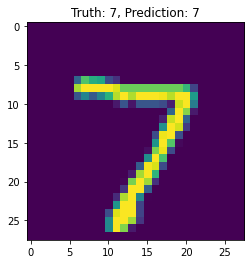

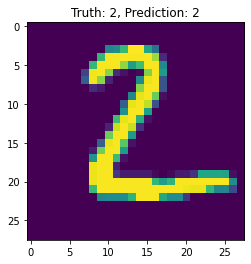

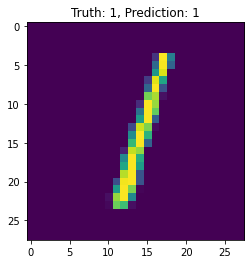

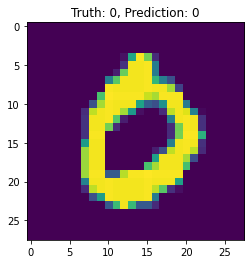

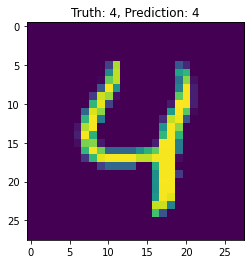

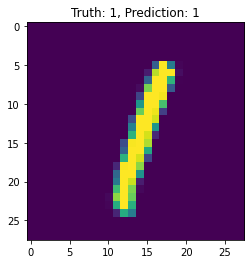

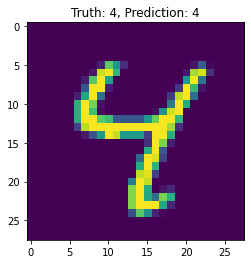

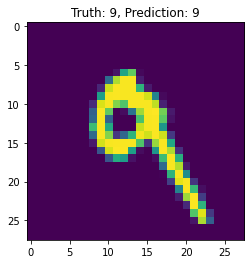

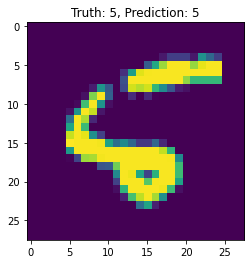

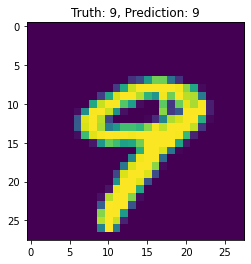

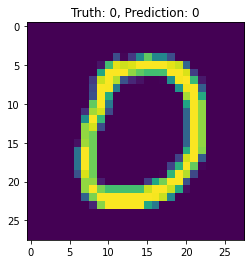

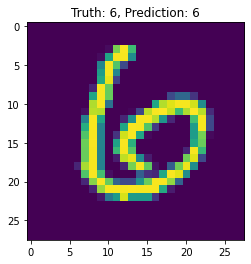

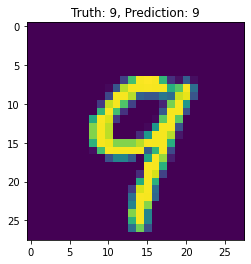

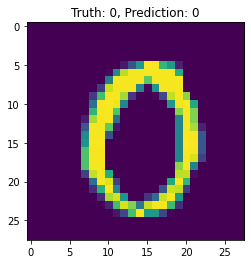

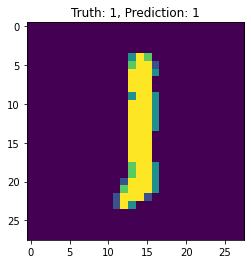

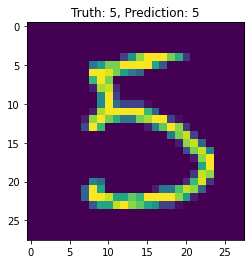

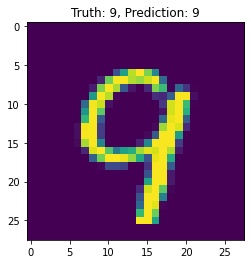

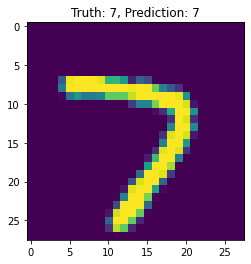

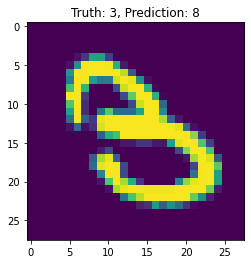

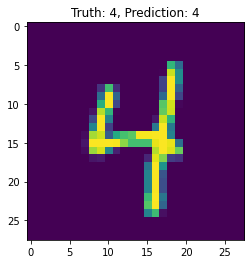

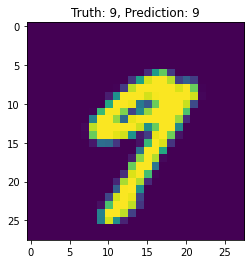

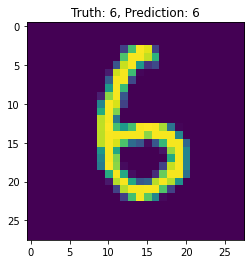

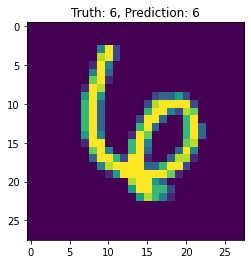

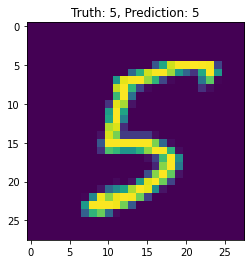

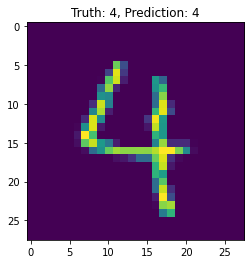

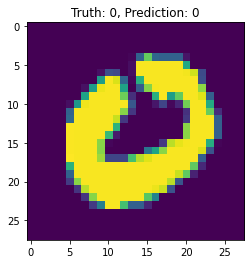

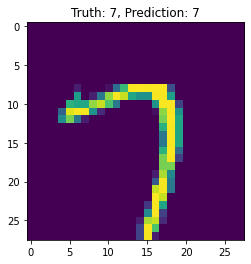

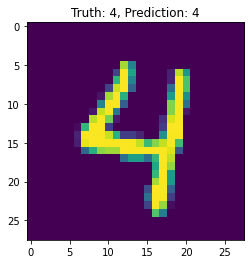

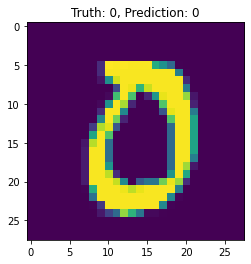

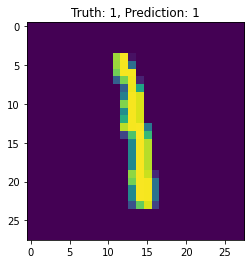

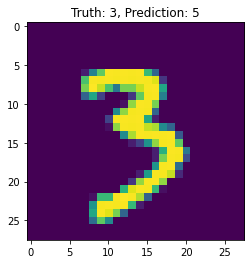

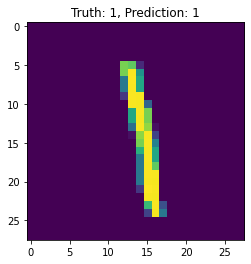

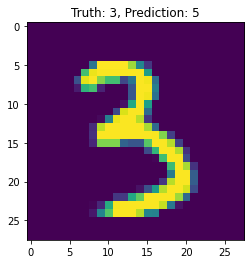

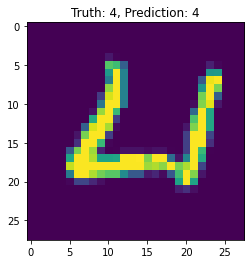

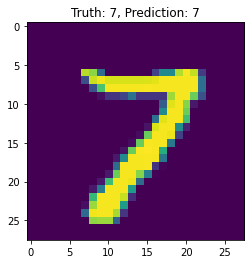

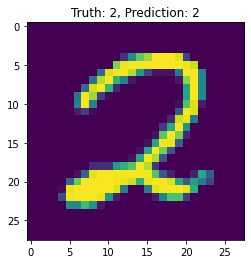

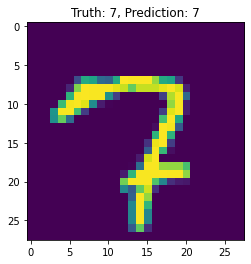

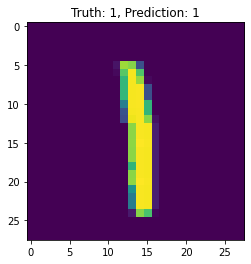

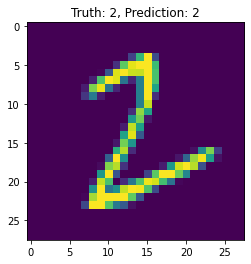

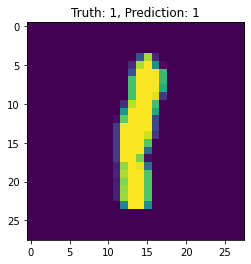

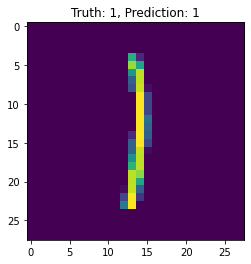

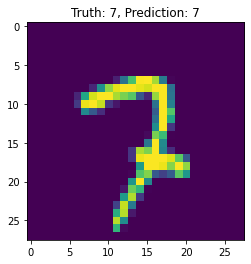

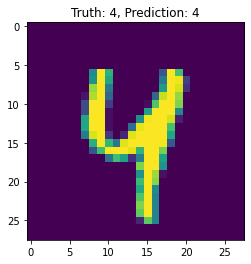

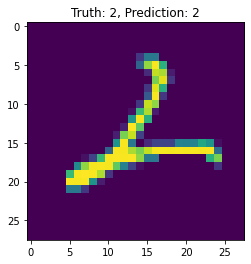

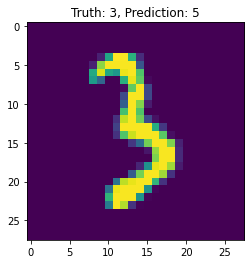

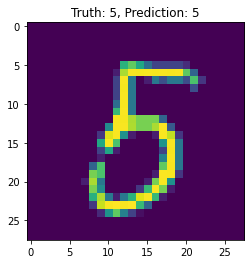

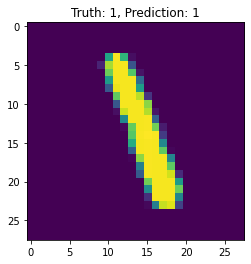

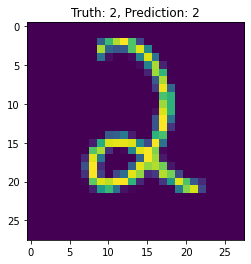

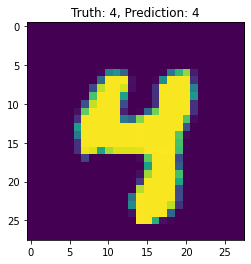

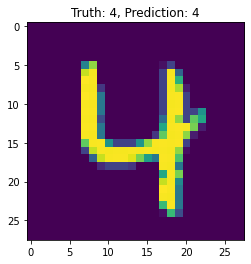

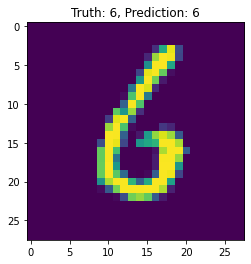

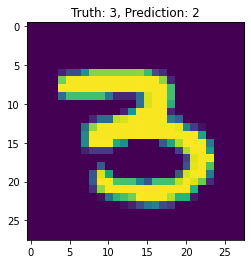

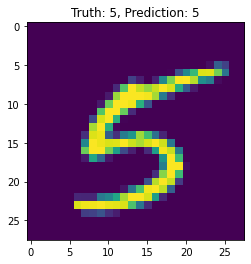

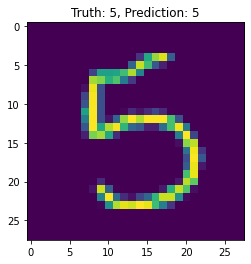

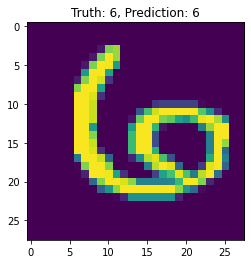

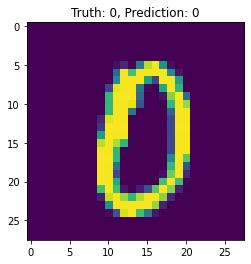

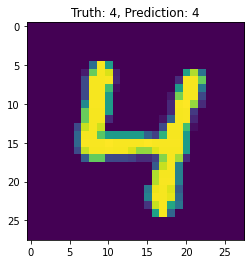

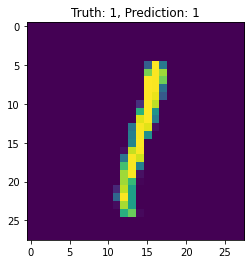

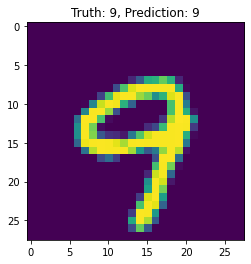

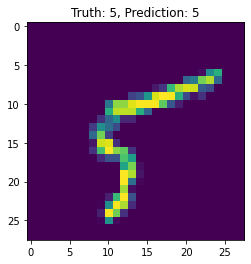

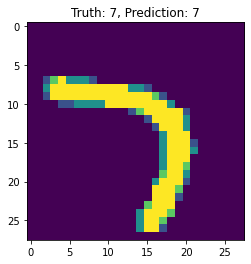

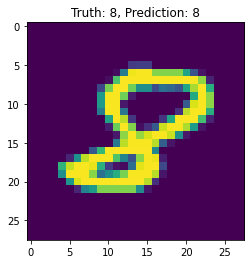

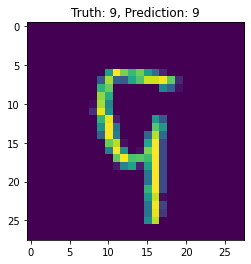

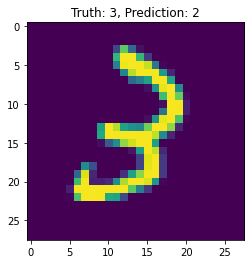

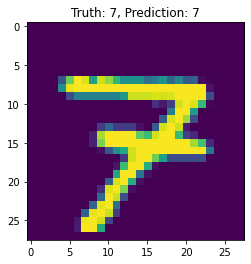

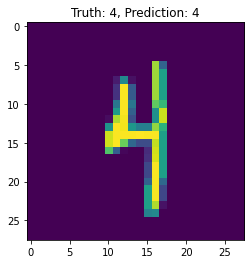

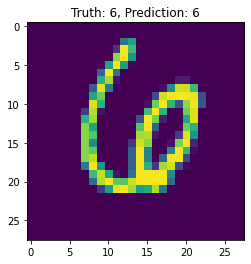

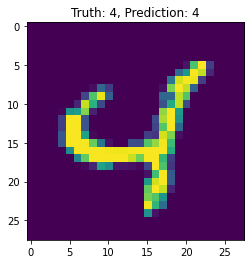

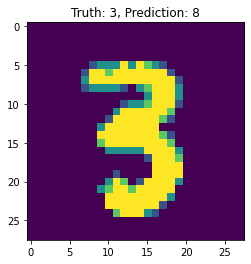

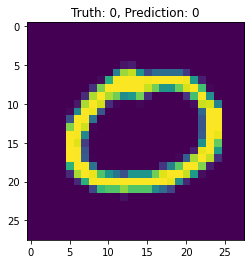

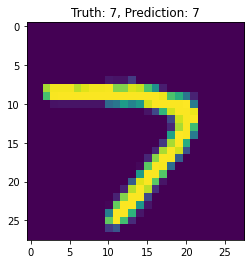

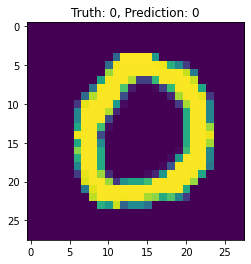

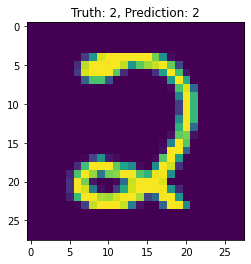

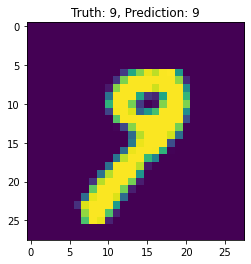

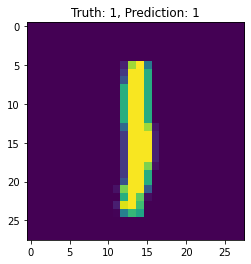

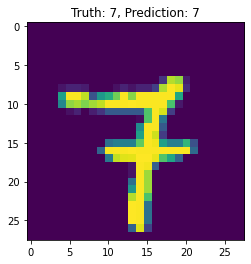

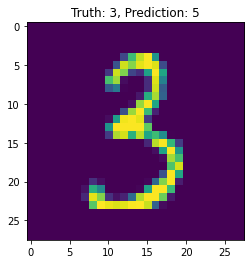

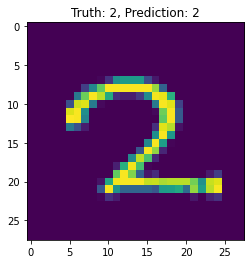

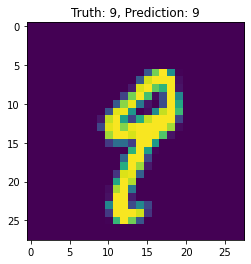

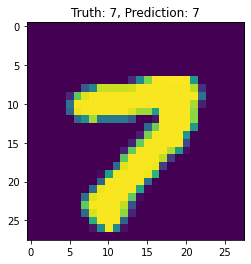

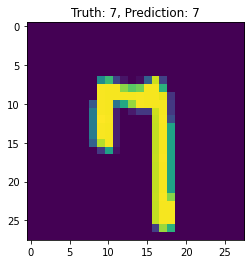

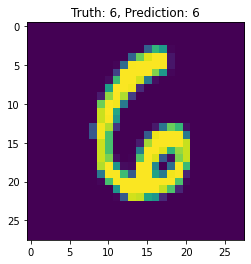

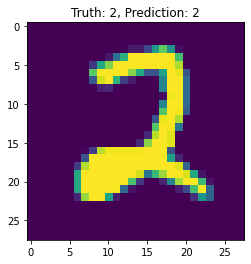

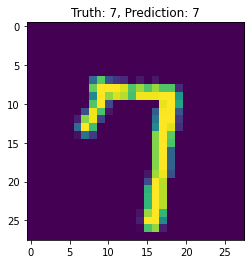

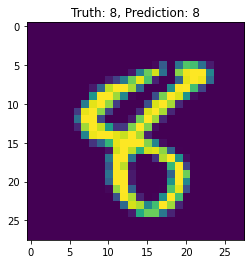

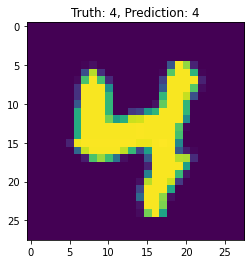

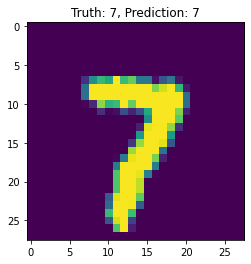

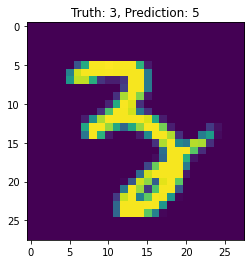

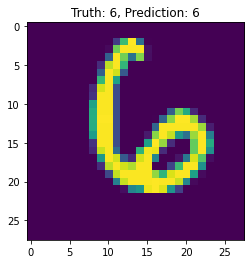

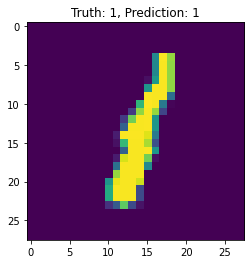

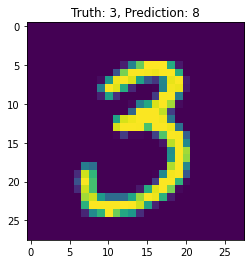

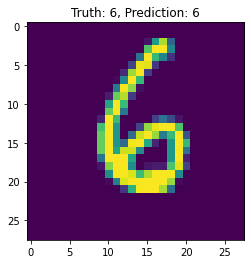

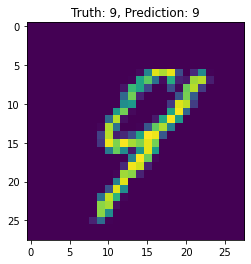

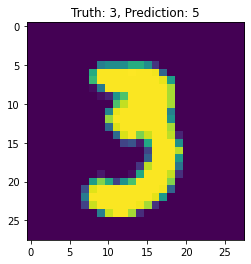

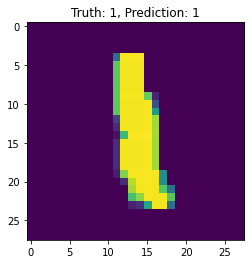

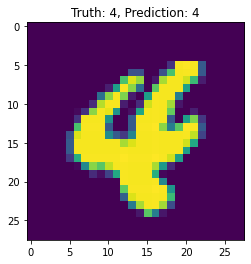

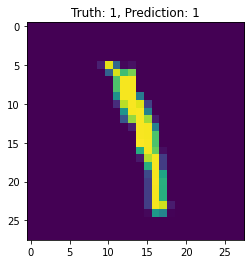

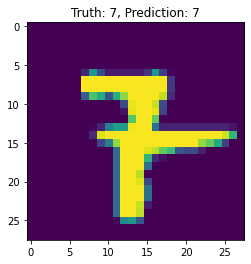

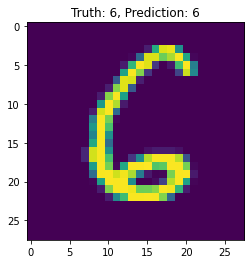

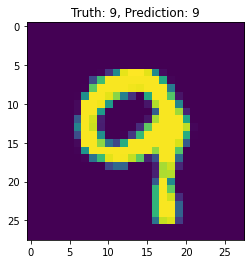

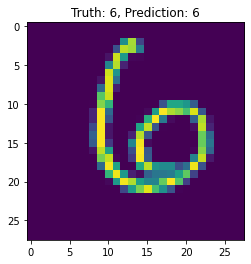

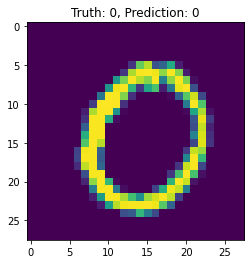

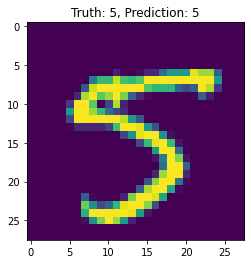

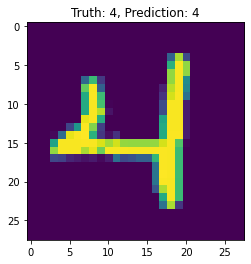

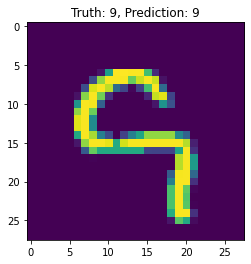

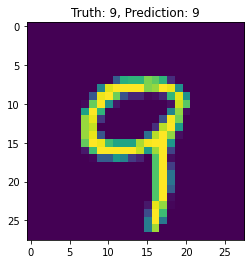

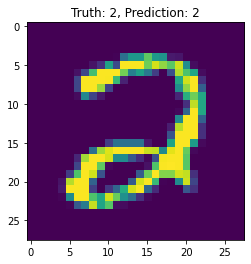

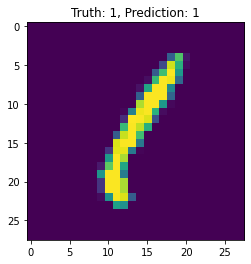

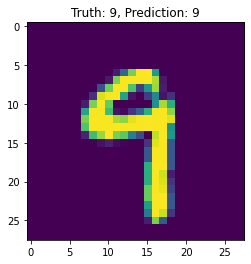

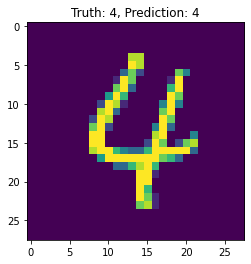

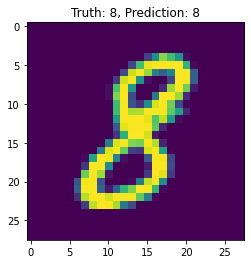

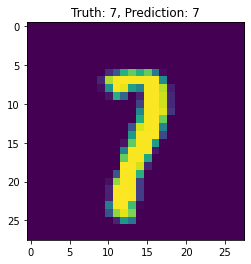

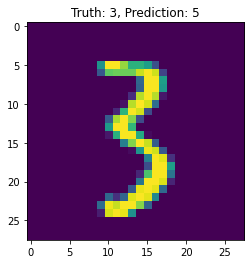

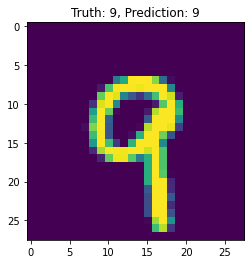

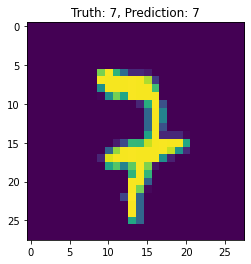

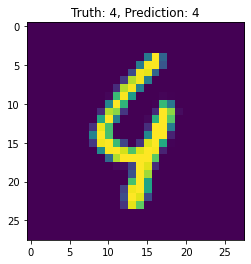

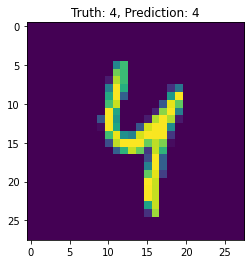

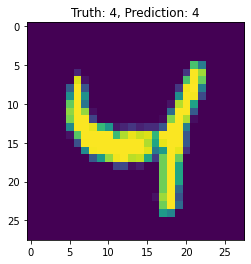

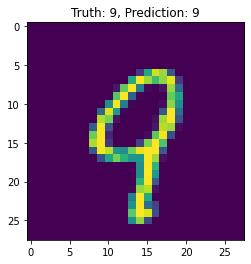

KeyboardInterrupt: ignored

In [0]:
model.eval()
with torch.no_grad():
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)


    # 현재 띄워진 plot 창을 비움 (다음 iteration에서 plot 창이 겹치지 않게 하기 위해)
    plt.cla()  

    # test_loader에서 불러온 tensor를 plot
    # image: (1, 1, 28, 28)
    # image[0][0]: (28, 28)
    plt.imshow(images[0][0]) 

    plt.title('Truth: {}, Prediction: {}'.format(labels.item(), predicted.item()))
    plt.pause(1)  # 화면에서 plot을 띄우고 1초 기다린다
